### Practice Exercise (Polynomial Regression model)

In [2]:
#loading dataset file 
import sys
from pathlib import Path

current_dir = Path.cwd()
project_root = current_dir.parent.absolute()
sys.path.insert(0,str(project_root))

from config import DATASETS_DIR, COFFEE_COOLING

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#loading the dataframe
df = pd.read_csv(COFFEE_COOLING)
print(f'Shape of the dataframe: {df.shape}\n')
print(f'Missing values:\n {df.isnull().sum()}')

X = df[['Minutes']].values
y = df[['Temperature_C']].values

Shape of the dataframe: (16, 2)

Missing values:
 Minutes          0
Temperature_C    0
dtype: int64


#####  Visualize the raw data

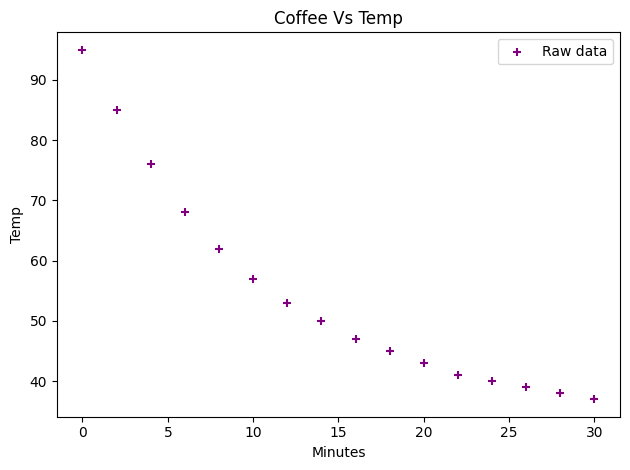

In [9]:
plt.scatter(X,y,color='purple',marker='+',label='Raw data')
plt.title('Coffee Vs Temp')
plt.ylabel('Temp')
plt.xlabel('Minutes')
plt.tight_layout()
plt.legend()
plt.show()

##### R2_score and visualization at different degree

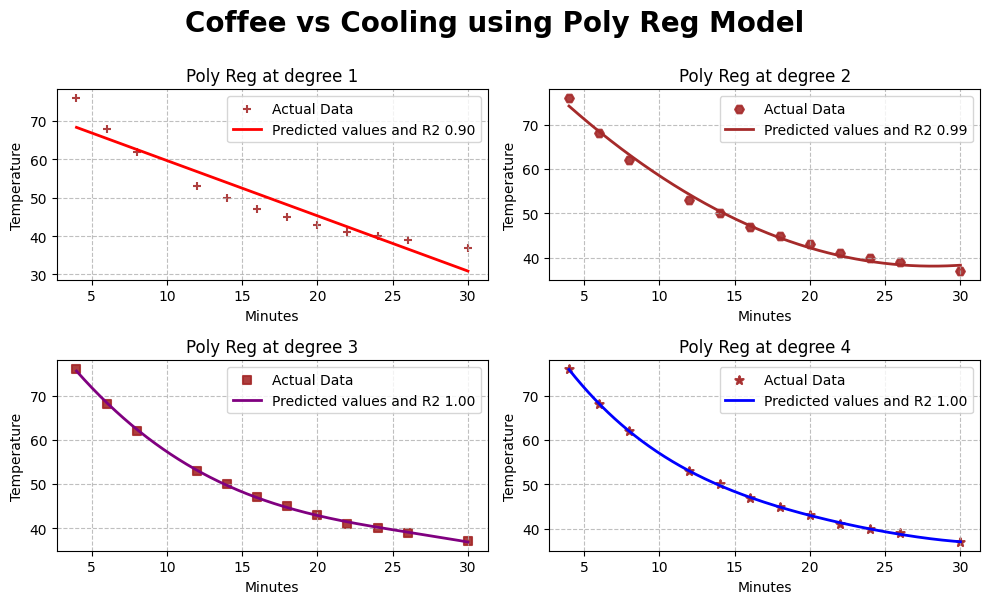

R2 score for the test set at degree 1 is 0.6800 and evaluation of model is Model needs improvement

R2 score for the test set at degree 2 is 0.9580 and evaluation of model is Perfect Model

R2 score for the test set at degree 3 is 0.9982 and evaluation of model is Perfect Model

R2 score for the test set at degree 4 is 0.9978 and evaluation of model is Perfect Model

Comparsion between Actual and Predicted Test set by DataFrame


,Actual_value,Predicted_value,Error
0,95,97.073733,-2.073733
1,85,85.400025,-0.400025
2,57,57.014807,-0.014807
3,38,37.759738,0.240262


In [42]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

degrees = [1,2,3,4]
colors=['r','brown','purple','blue']
markers=['+','H',',','*']
plt.figure(figsize=(10,6))

results=[]

for i, degree in enumerate(degrees):
    plt.subplot(2, 2, i+1)

    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    ln_poly = LinearRegression()
    ln_poly.fit(X_train_poly,y_train)

    #for smooth visualization 
    X_train_smooth = np.linspace(X_train.min(),X_train.max(),300).reshape(-1,1)
    X_train_smooth_poly = poly.transform(X_train_smooth)
    
    y_test_smooth_pred = ln_poly.predict(X_test_poly)
    y_train_smooth_pred = ln_poly.predict(X_train_smooth_poly)

    R2_train = r2_score(y_train,ln_poly.predict(X_train_poly))
    R2_test = r2_score(y_test,ln_poly.predict(X_test_poly))

    results.append({
        'degrees' : degree,
        'R2_train': R2_train,
        'R2_test': R2_test
    })

    #visualize the regression model at different degrees
    plt.scatter(X_train, y_train, 
                color='brown', 
                marker=markers[i],
                linewidth=1.5,
                s=40,
                alpha=0.9,
                label='Actual Data')
    plt.plot(X_train_smooth,
            y_train_smooth_pred,
            color=colors[i],
            linewidth=2,
            label=f'Predicted values and R2 {R2_train:.2f}')
    plt.title(f'Poly Reg at degree {degree}')
    plt.ylabel('Temperature')
    plt.xlabel('Minutes')
    plt.legend()
    plt.grid(True,linestyle='--',alpha=0.8)
plt.suptitle('Coffee vs Cooling using Poly Reg Model',y=1,fontweight=600,fontsize=20)
plt.tight_layout()
plt.show()

#comparing R2_score at different degrees

for res in results:
    if res['R2_test'] >= 0.9:
        arson = 'Perfect Model'
    elif res['R2_test'] >= 0.8:
        arson = 'Okish model'
    else:
        arson= 'Model needs improvement'
    print(f'R2 score for the test set at degree {res['degrees']} is {res['R2_test']:.4f} and evaluation of model is {arson}\n')


#comparsion between actual nd predicted value by dataframe
df_comparsion = pd.DataFrame({
    'Actual_value' : y_test.ravel(),
    'Predicted_value' : ln_poly.predict(X_test_poly).ravel(),
    'Error': y_test.ravel() - ln_poly.predict(X_test_poly).ravel()
})

print(f'Comparsion between Actual and Predicted Test set by DataFrame')
df_comparsion


